## Excercise 1

In [231]:
import numpy as np
import matplotlib . pyplot as plt
import random
import pandas as pd

### Question 1

In [232]:
def get_column(data: pd.DataFrame, index):
    return data.iloc[:,index]

def prepare_data(path_data, num_cols):
    
    data = pd.read_csv(path_data)
    X = []
    y = data.iloc[:,-1]
    for i in range(num_cols):
        X.append(get_column(data, i))

    return X, y

X , y = prepare_data ('./advertising.csv', 3)
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


## Ex2: kỹ thuật huấn luyện data dùng one sample - linear regression:

In [233]:
import numpy as np

def normalize(X):
    return (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)

def initialize_params():
    w1, w2, w3, b = (0.016992259082509283,
                     0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def update_parameters(x, w, y, y_hat, b, lr):
    derivative_w = x * 2 * (y_hat - y)
    derivative_b = 2 * (y_hat - y)

    w = w - (lr * derivative_w)
    b = b - (lr * derivative_b)
    return w, b

def predict(x, w, b):
    return np.dot(w, x) + b

def compute_loss(y, y_hat):
    loss = (y - y_hat)**2
    return loss

def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    # # Chuẩn hóa dữ liệu đầu vào
    # X_data = normalize(X_data)

    w1, w2, w3, b = initialize_params()
    N = np.shape(X_data)[1]     
    w = np.array([w1, w2, w3])
    losses = []

    # Vòng lặp qua từng sample
    for _ in range(epoch_max):
        for i in range(N):
            x = X_data[:, i]
            y = y_data[i]
            y_hat = predict(x, w, b)

            loss = compute_loss(y, y_hat)
            w, b = update_parameters(x, w, y, y_hat, b, lr)
            losses.append(loss)

    return w, b, losses


### Question 8

In [234]:
w, b, losses = implement_linear_regression(np.array(X), np.array(y))
print(w, b)

[0.07405984 0.1591736  0.0175612 ] 0.13924260940219846


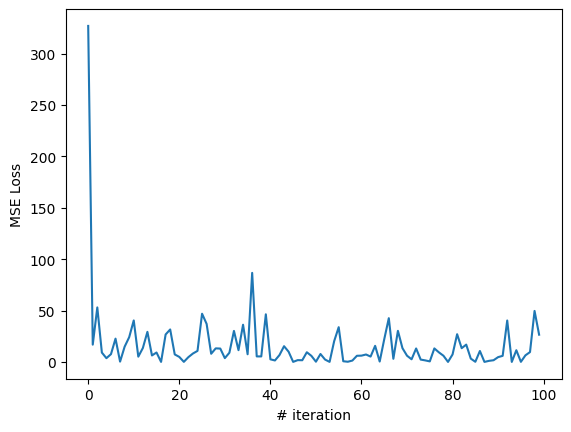

In [235]:
plt.plot(losses[:100])
plt.xlabel("# iteration")
plt.ylabel("MSE Loss")
plt.show()

### Question 2

In [236]:
import numpy as np

# Mảng x và w
x = np.array([1, 1, 1])  # Biến đầu vào
w = np.array([0, 0.5, 0])  # Trọng số
b = 0.5  # Bias

# Tính ŷ
y_hat = np.dot(w, x) + b
print("Giá trị dự đoán ŷ:", y_hat)

Giá trị dự đoán ŷ: 1.0


### Question 3

In [237]:
# Giá trị dự đoán và thực tế
y_hat = 1
y = 0.5

# Tính loss (MSE)
loss = compute_loss(y_hat, y)
print("Giá trị MSE (loss):", loss)

Giá trị MSE (loss): 0.25


### Question 4

In [238]:
def compute_gradient_wi(xi, y, y_hat):
    return -2 * (y - y_hat) * xi

xi = 1.0
y = 1.0
y_hat = 0.5

g_wi = compute_gradient_wi(xi, y, y_hat)
print("Giá trị của g_wi:", g_wi)

Giá trị của g_wi: -1.0


### Question 5

In [239]:
def compute_gradient_b(y, y_hat):
    return -2 * (y - y_hat)

y = 2.0
y_hat = 0.5

b = compute_gradient_b(y, y_hat)
print("Giá trị của b:", b)

Giá trị của b: -3.0


### Question 6

In [240]:
def update_weight_wi(wi, dl_dwi, lr):
    return wi - (lr * dl_dwi)


# Giá trị cho trước
wi = 1.0
dl_dwi = -0.5
lr = 1e-5

# Tính after_wi
after_wi = update_weight_wi(wi, dl_dwi, lr)
print("Giá trị của after_wi:", after_wi)

Giá trị của after_wi: 1.000005


### Question 7

In [241]:
def update_weight_b(b, dl_db, lr):
    return b - (lr * dl_db)


# Giá trị cho trước
b = 0.5
dl_db = -1.0
lr = 1e-5

# Tính after_b
b = update_weight_b(b, dl_db, lr)
print("Giá trị của after_b:", b)

Giá trị của after_b: 0.50001


### Question 9

In [242]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data('advertising.csv', 3)
w, b, losses = implement_linear_regression(np.array(X), np.array(y))
sales = predict(np.array([tv, radio, newspaper]), w, b)
print (f'predicted sales is {sales}')

predicted sales is 8.176413319549823


### Question 10

In [243]:
def compute_loss_mae(y_hat, y):
    return abs(y - y_hat)


l = compute_loss_mae(y_hat=1, y=0.5)
print(f"Mean Absolute Error: {l}")

Mean Absolute Error: 0.5


## Ex 3: Kỹ thuật huấn luyện data dùng batch N samples - linear regression :

In [244]:
def compute_loss_mse(y_true, y_pred):

    """
    Tính toán Mean Squared Error (MSE) giữa giá trị thực tế và dự đoán.
    Args:
        y_true: Giá trị thực tế (ground truth).
        y_pred: Giá trị dự đoán từ mô hình.
    Returns:
        mse: Giá trị Mean Squared Error.
    """
    error = y_true - y_pred
    squared_error = error ** 2

    return squared_error

def predict(x1, x2, x3, w1, w2, w3, b):
    """
    Hàm dự đoán đầu ra từ các biến đầu vào x1, x2, x3 và các trọng số w1, w2, w3 cùng b.
    """

    return w1 * x1 + w2 * x2 + w3 * x3 + b


def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):

    losses = []
    # Khởi tạo tham số
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    # Vòng lặp qua các epoch

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        # Vòng lặp qua từng mẫu dữ liệu
        for i in range(N):
            # Lấy một mẫu
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]


            y = y_data[i]


            # Tính toán đầu ra dự đoán
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính loss
            loss = compute_loss_mse(y, y_hat)

            # Cộng dồn loss
            loss_total += loss

            # Tính gradient của w1, w2, w3, và b

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Cộng dồn gradient

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        w1 -= lr * dw1_total / N
        w2 -= lr * dw2_total / N
        w3 -= lr * dw3_total / N
        b -= lr * db_total / N

        # Ghi lại loss trung bình của epoch
        losses.append(loss_total / N)


    return (w1, w2, w3, b, losses)

0.06710990754044266 0.15756173831487585 0.029619799386084403


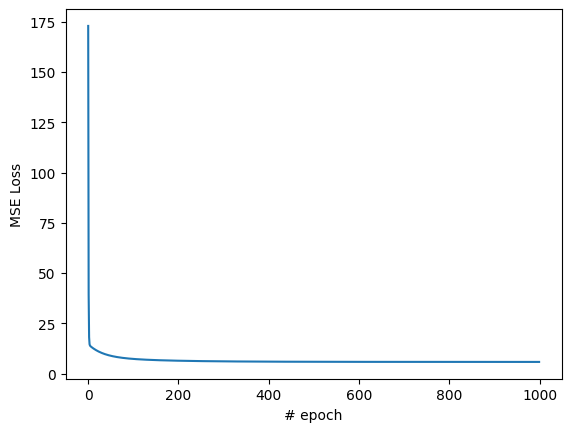

In [245]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X, y, epoch_max=1000, lr=1e-5)

print(w1, w2, w3)

# Vẽ biểu đồ MSE Loss qua các epoch
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE Loss")
plt.show()

### Question 11

In [246]:
def get_column(data: pd.DataFrame, index):
    return data.iloc[:, index]

def prepare_data(path_data, num_cols):

    data = pd.read_csv(path_data)
    X = []
    y = data.iloc[:, -1]
    for i in range(num_cols):
        X.append(get_column(data, i))

    return X, y

X, y = prepare_data('./advertising.csv', 3)
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X, y, epoch_max=50, lr=1e-5)

print(w1, w2, w3)

0.0777391352775665 0.056447699046257765 0.04135488482198376


## Ex 4:

In [247]:
import pandas as pd
import numpy as np


def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    # comment this line for real application
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]
    # return [bias, w1, w2, w3]

def predict(X_features, weights):
    result = np.dot(X_features, weights)

    return result

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
    X_features = np.array(X_features)
    dl_dweights = 2 * (X_features * (y_hat - y))

    return dl_dweights

def update_weight(weights, dl_dweights, lr):
    weights = weights - (lr * dl_dweights) 

    return weights

def get_column(data: pd.DataFrame, index):
    return data.iloc[:, index]


def prepare_data(path_data, num_cols):
    data = pd.read_csv(path_data)

    X = []
    features = []
    y = data.iloc[:, -1] 

    for i in range(num_cols):
        features.append(get_column(data, i))

    features = np.array(features).T
    for i in range(features.shape[0]):
        sample = features[i].tolist()
        sample.insert(0, 1)
        X.append(sample) 

    return X, y

X, y = prepare_data('./advertising.csv', 3)

print(X)

[[1, 230.1, 37.8, 69.2], [1, 44.5, 39.3, 45.1], [1, 17.2, 45.9, 69.3], [1, 151.5, 41.3, 58.5], [1, 180.8, 10.8, 58.4], [1, 8.7, 48.9, 75.0], [1, 57.5, 32.8, 23.5], [1, 120.2, 19.6, 11.6], [1, 8.6, 2.1, 1.0], [1, 199.8, 2.6, 21.2], [1, 66.1, 5.8, 24.2], [1, 214.7, 24.0, 4.0], [1, 23.8, 35.1, 65.9], [1, 97.5, 7.6, 7.2], [1, 204.1, 32.9, 46.0], [1, 195.4, 47.7, 52.9], [1, 67.8, 36.6, 114.0], [1, 281.4, 39.6, 55.8], [1, 69.2, 20.5, 18.3], [1, 147.3, 23.9, 19.1], [1, 218.4, 27.7, 53.4], [1, 237.4, 5.1, 23.5], [1, 13.2, 15.9, 49.6], [1, 228.3, 16.9, 26.2], [1, 62.3, 12.6, 18.3], [1, 262.9, 3.5, 19.5], [1, 142.9, 29.3, 12.6], [1, 240.1, 16.7, 22.9], [1, 248.8, 27.1, 22.9], [1, 70.6, 16.0, 40.8], [1, 292.9, 28.3, 43.2], [1, 112.9, 17.4, 38.6], [1, 97.2, 1.5, 30.0], [1, 265.6, 20.0, 0.3], [1, 95.7, 1.4, 7.4], [1, 290.7, 4.1, 8.5], [1, 266.9, 43.8, 5.0], [1, 74.7, 49.4, 45.7], [1, 43.1, 26.7, 35.1], [1, 228.0, 37.7, 32.0], [1, 202.5, 22.3, 31.6], [1, 177.0, 33.4, 38.7], [1, 293.6, 27.7, 1.8], [1

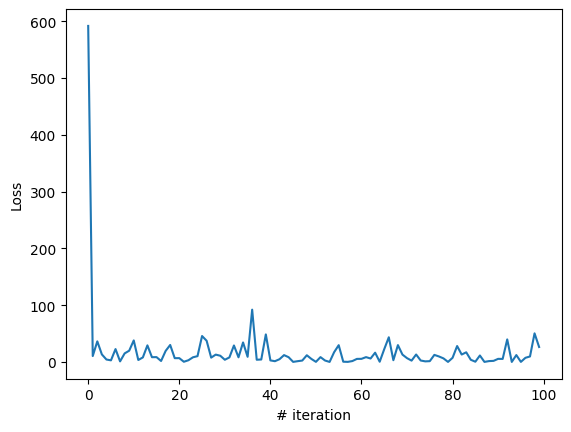

In [248]:
import matplotlib.pyplot as plt

def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)

    for _ in range(epoch_max):

        for i in range(N):
            features_i = X_feature[i]
            y = y_output[i]

            y_hat = predict(features_i, weights)

            loss = compute_loss(y, y_hat)

            dl_dweights = compute_gradient_w(features_i, y, y_hat)
            weights = update_weight(weights, dl_dweights, lr)

            losses.append(loss)

    return weights, losses


X, y = prepare_data('./advertising.csv', 3)
W, L = implement_linear_regression(X, y)

# Vẽ biểu đồ loss theo iteration
plt.plot(L[0:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.show()

### Question 12

In [249]:
# Thực hiện hồi quy tuyến tính với 50 epochs
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

print(L[9999])

31.339223408109948


## Ex (optional) : kỹ thuật huấn luyện data dùng Mini-batch Training samples - linear regression:

[15.79017422143921, 8.494419653475102, 8.493802912483961, 8.493186257344624, 8.492569688045117, 8.491953204573496, 8.491336806917808, 8.490720495066087, 8.49010426900639, 8.489488128726762, 8.488872074215262, 8.48825610545994, 8.48764022244885, 8.487024425170048, 8.486408713611592, 8.48579308776155, 8.485177547607972, 8.484562093138935, 8.483946724342493, 8.483331441206712, 8.482716243719668, 8.482101131869435, 8.48148610564407, 8.480871165031658, 8.480256310020266, 8.479641540597978, 8.47902685675287, 8.47841225847302, 8.477797745746512, 8.477183318561426, 8.476568976905854, 8.475954720767877, 8.475340550135584, 8.474726464997067, 8.474112465340413, 8.473498551153725, 8.47288472242509, 8.472270979142607, 8.47165732129437, 8.471043748868484, 8.47043026185305, 8.46981686023617, 8.469203544005953, 8.468590313150504, 8.467977167657928, 8.46736410751633, 8.466751132713835, 8.466138243238548, 8.465525439078586, 8.464912720222063, 8.4643000866571, 8.463687538371818, 8.463075075354332, 8.4624

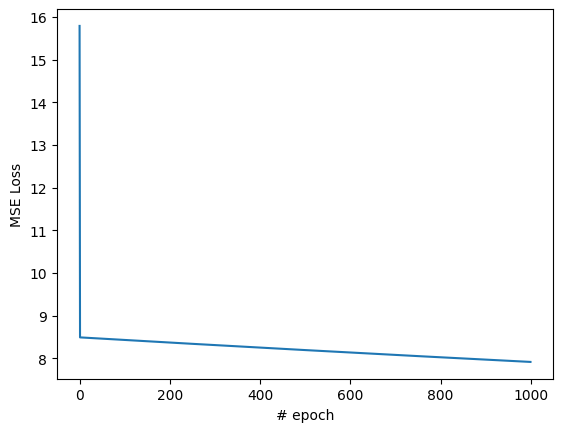

[0.07810971 0.06819582 0.05880959] 0.3343288604795454


In [250]:
def get_column(data: pd.DataFrame, index):
    return data.iloc[:, index]

def prepare_data(path_data, num_cols):

    data = pd.read_csv(path_data)
    X = []
    y = data.iloc[:, -1]
    for i in range(num_cols):
        X.append(get_column(data, i))

    return X, y

def initialize_params():
    w1, w2, w3, b = (0.016992259082509283,0.0070783670518262355, -0.002307860847821344, 0)

    return w1, w2, w3, b

def update_parameters(x, w, y, y_hat, b, lr):
    derivative_w = np.sum((x * 2 * (y_hat - y)), axis=0)
    derivative_b = 2 * (y_hat - y)

    w = w - (lr * np.mean(derivative_w))
    b = b - (lr * np.mean(derivative_b))

    return w, b

def predict(x: np.array, w: np.array, b: float):
    return w.dot(x) + b

def compute_loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)

def implement_linear_regression_nsamples(X_data , y_data , epoch_max =50 , lr =1e-5, m = 10):

    w1, w2, w3, b = initialize_params()

    N = np.shape(X_data)[1]
    w = np.array([w1, w2, w3])

    losses = []
    # Vòng lặp qua từng sample
    for _ in range(epoch_max):
        loss_total = 0.0
        for i in range(0, N, m):
            x = X_data[:, i:i + m]
            y = y_data[i:i + m]
            # print(f"x:{x}", f"y:{y}")
            y_hats = predict(x, w, b)

            # Tính loss cho batch
            loss = compute_loss(y, y_hats)
            w, b = update_parameters(x, w, y, y_hats, b, lr)

            loss_total += loss

        losses.append(loss_total / (N // m))

    return w, b, losses


X, y = prepare_data('./advertising.csv', 3)
w, b, losses = implement_linear_regression_nsamples(np.array(X), np.array(y),epoch_max=1000, lr=1e-5)

print(losses)
plt.plot(losses)

plt.xlabel("# epoch")

plt.ylabel("MSE Loss")

plt.show()

print(w, b)

## Test debug (đừng qtâm file này)

In [251]:
a = np.array([1, 2, 3, 4])
b = np.array([2, 3, 4, 5])

print(((a - b)**2)/ 2)

[0.5 0.5 0.5 0.5]


In [252]:
for i in range(0,5,2):
    print(a[i:i+2])

[1 2]
[3 4]
[]


In [253]:
a = np.array([[230.1, 44.5],
            [ 37.8 , 39.3],
            [ 69.2 , 45.1]])

w = np.array([0.016992259082509283, 0.0070783670518262355, -0.002307860847821344])
print(w.dot(a) + 2)

[6.01777712 2.93025083]


In [254]:
print(a.T)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]]


#### Test tính đạo hàm w M-batch

In [255]:
x = np.array([[230.1, 44.5],
              [37.8, 39.3],
              [69.2, 45.1]])
y = np.array([6.01777712, 2.93025083])
result = 2 *x * y

print(result)
sum_result = np.sum((x * y), axis=0)
print(sum_result)

[[2769.38103062  260.79232387]
 [ 454.94395027  230.31771524]
 [ 832.86035341  264.30862487]]
[2028.59266715  377.70933199]
